# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
place = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        place.append(lat_lng)

specific_lats = list(zip(cities,place))        

# Print the city count to confirm sufficient count
print(f'Attempting to process {len(cities)} cities.')

Attempting to process 624 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
counter = 0
city_responses = []


for city in specific_lats:
    api_url = f'{base_url}{city[0]}&appid={weather_api_key}&units=imperial'

    try:
        response = requests.get(api_url).json()
        counter += 1
        cap_city = city[0].title()
        city_responses.append({'City': cap_city, 'Lat':city[1][0], 
                           'Lng':city[1][1],
                           'Max Temperature': response['main']['temp_max'],
                           'Humidity': response['main']['humidity'],
                           'Cloudiness': response['clouds']['all'],
                           'Windspeed': response['wind']['speed'],
                           'Country' : response['sys']['country'],
                           'Date': response['dt']
                          })
    
        print(f'Processing record {counter} for {cap_city}')
        
    except KeyError:
        print(f'Record {counter} for {cap_city} was not found.  Skipping...')


Processing record 1 for Nanortalik
Processing record 2 for Baykit
Processing record 3 for Clyde River
Processing record 4 for Punta Arenas
Processing record 5 for Beira
Processing record 6 for Mayumba
Processing record 7 for Lompoc
Processing record 8 for Chicama
Processing record 9 for Port Lincoln
Processing record 10 for East London
Processing record 11 for Carnarvon
Processing record 12 for Aksha
Processing record 13 for Kapaa
Processing record 14 for Mehamn
Processing record 15 for Hobart
Processing record 16 for Haines Junction
Processing record 17 for Ushuaia
Processing record 18 for Inuvik
Record 19 for Viligili was not found.  Skipping...
Processing record 20 for Bambous Virieux
Processing record 21 for Saskylakh
Processing record 22 for Georgetown
Processing record 23 for Raudeberg
Processing record 24 for Beloha
Record 25 for Taolanaro was not found.  Skipping...
Processing record 26 for Busselton
Record 27 for Zamhlay was not found.  Skipping...
Record 28 for Grand River So

Processing record 225 for Benguela
Processing record 226 for Silopi
Processing record 227 for Belyy Yar
Processing record 228 for Port Alfred
Processing record 229 for Am Timan
Processing record 230 for Oros
Processing record 231 for Muisne
Processing record 232 for Corner Brook
Record 233 for Duz was not found.  Skipping...
Processing record 234 for Prince Albert
Processing record 235 for Cabo San Lucas
Processing record 236 for Tianpeng
Processing record 237 for Avarua
Processing record 238 for Shu
Processing record 239 for Pevek
Processing record 240 for Bridgetown
Processing record 241 for San Patricio
Processing record 242 for Viedma
Processing record 243 for Zhezkazgan
Processing record 244 for Chermoz
Processing record 245 for Pokaran
Processing record 246 for Poum
Processing record 247 for Porto Velho
Processing record 248 for Makakilo City
Processing record 249 for Tonj
Processing record 250 for Mwinilunga
Processing record 251 for Liwale
Processing record 252 for Bandarbeyla


Processing record 448 for Araouane
Processing record 449 for Abu Dhabi
Processing record 450 for Port Hardy
Processing record 451 for Caravelas
Processing record 452 for Porto Novo
Processing record 453 for Ostrovnoy
Record 454 for Rungata was not found.  Skipping...
Processing record 455 for Marijampole
Processing record 456 for Northam
Processing record 457 for Manta
Processing record 458 for Mweka
Processing record 459 for Aksarka
Processing record 460 for Pauini
Processing record 461 for Albemarle
Processing record 462 for Fort Nelson
Processing record 463 for Fortuna
Processing record 464 for Pangai
Processing record 465 for Kandrian
Processing record 466 for Biltine
Processing record 467 for Dhidhdhoo
Processing record 468 for Whitehorse
Processing record 469 for Sept-Iles
Processing record 470 for Dakar
Processing record 471 for Kardla
Processing record 472 for Nara
Record 473 for Mouzakion was not found.  Skipping...
Processing record 474 for Newport
Processing record 475 for S

In [4]:
city_df = pd.DataFrame(city_responses)
city_df.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Nanortalik,52.900587,-36.458261,52.18,66,98,14.74,GL,1595369392
1,Baykit,62.405033,96.822185,54.75,71,100,1.95,RU,1595369392
2,Clyde River,72.839069,-73.057257,44.60,93,90,6.93,CA,1595369392
3,Punta Arenas,-85.252199,-114.347033,28.40,86,13,4.70,CL,1595369392
4,Beira,-21.405820,36.711405,69.80,77,3,9.17,MZ,1595369392


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df.count()
city_df.to_csv('../output_data/city_data.csv', index=False) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.sort_values(['Humidity'], ascending = False)
#There are no cities with humidity > 100

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Country,Date
10,Carnarvon,-20.808483,99.961550,57.20,100,0,8.05,AU,1595369097
522,Port Augusta,-31.849935,136.106791,36.00,100,0,5.82,AU,1595369475
71,Mnogovershinnyy,54.460246,139.062125,52.41,100,100,3.91,RU,1595369403
560,Bagepalli,13.789617,78.021405,73.40,100,20,6.93,IN,1595369482
13,Mehamn,80.928824,26.821469,50.00,100,40,4.70,NO,1595369393
...,...,...,...,...,...,...,...,...,...
570,Susanville,40.810355,-121.276251,96.80,13,1,6.93,US,1595369369
105,Fernley,40.447923,-119.467981,98.60,11,40,12.75,US,1595369409
121,Taoudenni,23.947163,-2.885980,104.41,9,0,14.43,ML,1595369412
318,Ridgecrest,36.434311,-117.845632,107.60,6,75,16.11,US,1595369444


In [7]:
city_df.describe()
#again no cities with humidity > 100

,Lat,Lng,Max Temperature,Humidity,Cloudiness,Windspeed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,18.448894,15.221301,69.162049,71.100694,47.552083,7.500625,1.595369e+09
std,37.548609,91.229809,13.885945,19.586782,38.815471,5.053355,7.514545e+01
min,-89.169698,-178.609102,28.400000,1.000000,0.000000,0.470000,1.595369e+09
25%,-8.460780,-59.839206,57.895000,60.000000,4.000000,3.910000,1.595369e+09
50%,20.383718,17.902941,71.135000,75.000000,40.500000,6.440000,1.595369e+09
75%,50.478098,92.027590,78.800000,87.000000,89.250000,9.480000,1.595369e+09
max,89.502366,179.888657,107.600000,100.000000,100.000000,33.980000,1.595369e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
#function will draw scatter plots for all remaining cells.

def scatterDraw(yValue, yValueUnit, graphColor, dataframe, titleValue):
    plt.figure(figsize=(9, 5))
    plt.scatter(dataframe['Lat'], dataframe[yValue], marker = 'o', 
                color = graphColor, alpha = 0.5, edgecolors = 'grey')
    plt.xlabel('Latitude')
    plt.ylabel(f'{yValue} ({yValueUnit})')
    plt.title(f'{titleValue} Latitude vs. {yValue} ({yValueUnit}) ({date.today()})')
    plt.grid()
    
    saveFig(yValue, yValueUnit, titleValue)


In [9]:
#function will draw regression lines for all scatter plots.
#takes 4 params for line itself and also where to place the line on the graph.

def regressionLine(x,y, text_place_x, text_place_y):

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print("R-squared: %f" % r_value**2)
    plt.plot(x, intercept + slope*x, 'r', label='regression line')
    plt.text(text_place_x, text_place_y, f'y = {round(slope,3)}x + {round(intercept,3)}', color = 'red', fontsize = 12)
    plt.legend()

In [10]:
def saveFig(yValue, yValueUnit, titleValue):
    figpath = f'../output_data/{titleValue} Latitude vs. {yValue} ({yValueUnit}).png'

    plt.savefig(figpath)

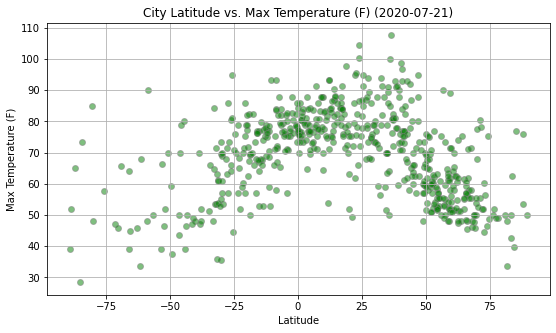

In [11]:
plot = scatterDraw('Max Temperature', 'F', 'green', city_df, 'City')
plt.show()

## Latitude vs. Humidity Plot

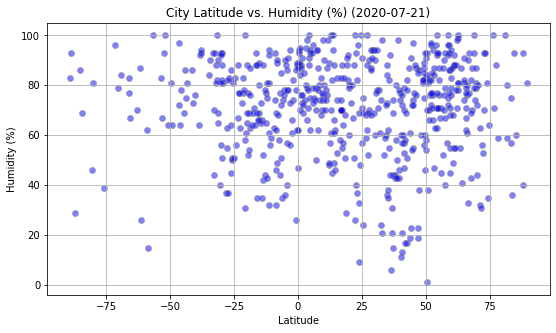

In [12]:
plot = scatterDraw('Humidity', '%', 'blue', city_df, 'City')
plt.show()

## Latitude vs. Cloudiness Plot

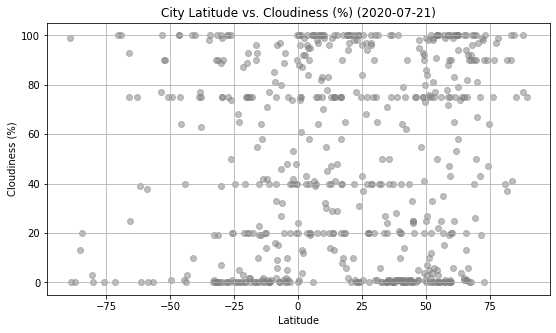

In [13]:
plot = scatterDraw('Cloudiness', '%', 'grey', city_df, 'City')
plt.show()

## Latitude vs. Wind Speed Plot

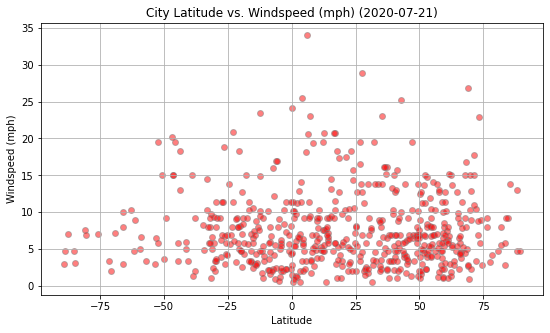

In [14]:
plot = scatterDraw('Windspeed', 'mph', 'red', city_df, 'City')
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df['Lat'] >= 0]
northern_df = northern_df.copy()

southern_df = city_df.loc[city_df['Lat'] <= 0]
southern_df = southern_df.copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.416176


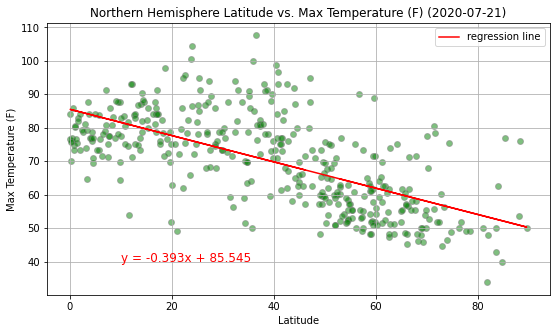

In [16]:
#Each cell will draw scatter, regression line and save by calling functions with the appropriate params.
#must call the saveFig last to overwrite initial save to add regression line.

plot = scatterDraw('Max Temperature', 'F', 'green', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Max Temperature'], 10, 40)
saveFig('Max Temperature', 'F', 'Northern Hemisphere')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.319902


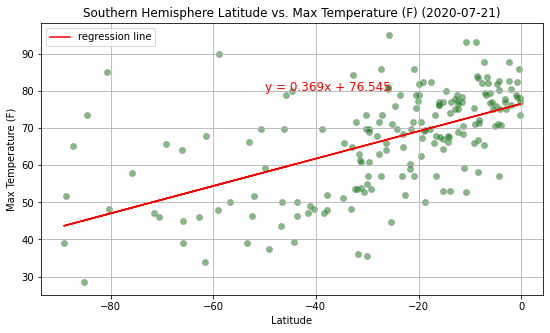

In [17]:
plot = scatterDraw('Max Temperature', 'F', 'green', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Max Temperature'], -50, 80)
saveFig('Max Temperature', 'F', 'Southern Hemisphere')

plt.show()

# Observation
There appears to be a significant correlation between latitute and max temperature.  This makes sense since the closer to the equator the warmer the max temps are.  However, the correlations seems stronger for the southern hemisphere which is in wintertime right now.  This could be due to a smaller sample size and relative locations in the smaller sample size.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.002115


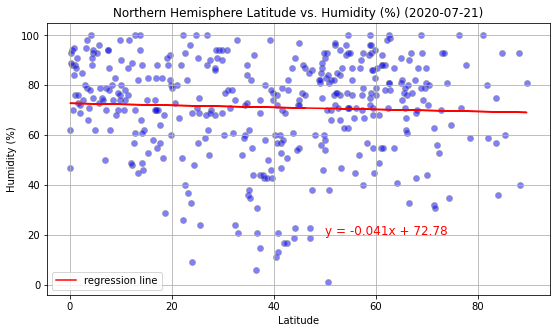

In [18]:
plot = scatterDraw('Humidity', '%', 'blue', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Humidity'], 50, 20)
saveFig('Humidity', '%', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.006028


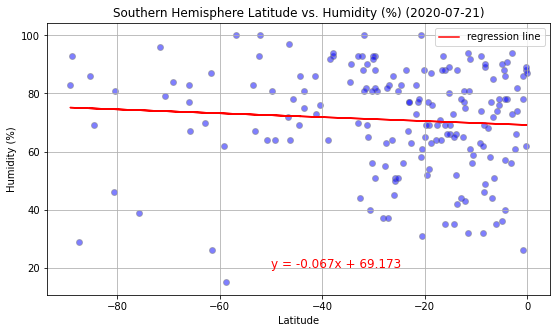

In [19]:
plot = scatterDraw('Humidity', '%', 'blue', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Humidity'], -50, 20)
saveFig('Humidity', '%', 'Southern Hemisphere')
plt.show()

# Observation
While there is generally a weak correlation of Humidity and latitude, what is surprising is the relative humidity is clustered around 70% for most of the earth.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.000082


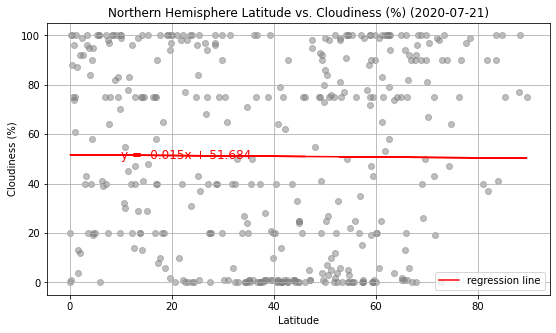

In [20]:
plot = scatterDraw('Cloudiness', '%', 'grey', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Cloudiness'], 10, 50)
saveFig('Cloudiness', '%', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.006470


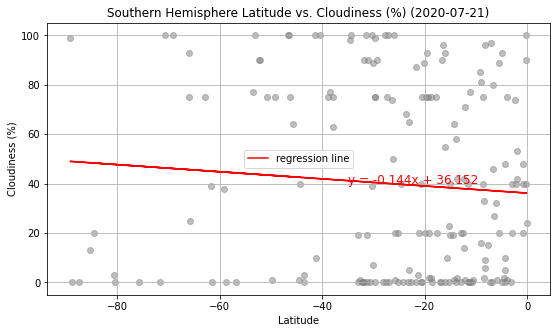

In [21]:
plot = scatterDraw('Cloudiness', '%', 'grey', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Cloudiness'], -35, 40)
saveFig('Cloudiness', '%', 'Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.003509


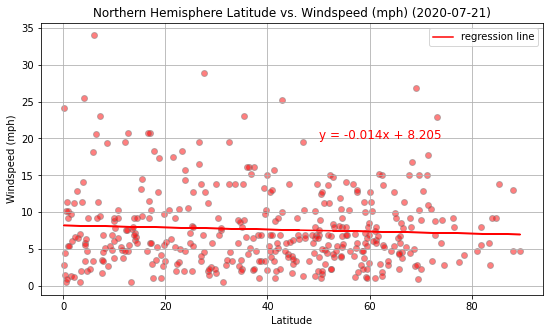

In [22]:
plot = scatterDraw('Windspeed', 'mph', 'red', northern_df, 'Northern Hemisphere')
regress = regressionLine(northern_df['Lat'], northern_df['Windspeed'], 50, 20)
saveFig('Windspeed', 'mph', 'Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.003304


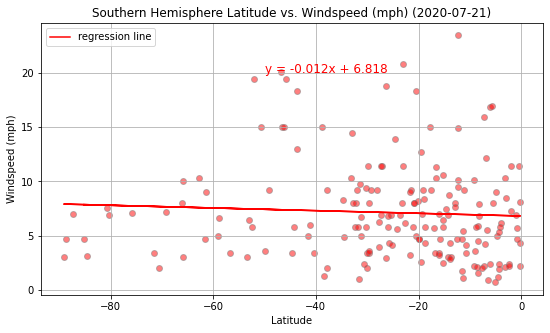

In [23]:
plot = scatterDraw('Windspeed', 'mph', 'red', southern_df, 'Southern Hemisphere')
regress = regressionLine(southern_df['Lat'], southern_df['Windspeed'], -50, 20)
saveFig('Windspeed', 'mph', 'Southern Hemisphere')
plt.show()

# Observation
There are very week correlations between windspeed and cloudiness and latitude.  But the cloudiness data seems to cluster around the extremes.  If the hemispheres were broken in half again, there may be an interesting trend particularly in the northern hemisphere.